## Trying to interpret singular vectors

In [1]:
%run ../imports.py

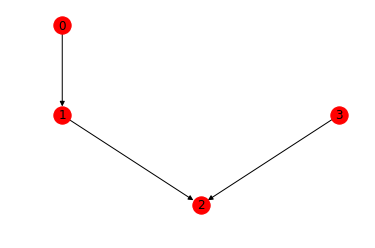

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (1,2),
    (3,2)
])
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [4]:
L

matrix([[ 1, -1,  0,  0],
        [ 0,  1, -1,  0],
        [ 0,  0,  0,  0],
        [ 0,  0, -1,  1]], dtype=int64)

### Symmetrization

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [6]:
Q

matrix([[ 0.2706, -0.6533,  0.6533, -0.2706],
        [ 0.5   , -0.5   , -0.5   ,  0.5   ],
        [-0.6533, -0.2706,  0.2706,  0.6533]])

In [7]:
print(eqL)

[[ 0.5455 -0.4545  0.0909 -0.1818]
 [-0.4545  1.0455 -0.4091 -0.1818]
 [ 0.0909 -0.4091  0.6818 -0.3636]
 [-0.1818 -0.1818 -0.3636  0.7273]]


Create undirected graph from the equivalent Laplacian

In [8]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [9]:
print(eqL)

[[ 0.5455 -0.4545  0.0909 -0.1818]
 [-0.4545  1.0455 -0.4091 -0.1818]
 [ 0.0909 -0.4091  0.6818 -0.3636]
 [-0.1818 -0.1818 -0.3636  0.7273]]


In [10]:
np.linalg.matrix_rank(eqL)

3

In [11]:
posG, negG = separate_graphs(eqL)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


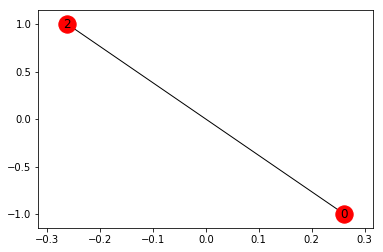

In [12]:
nx.draw_networkx(negG)

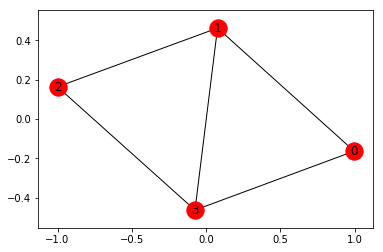

In [13]:
nx.draw_networkx(posG)

In [14]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [15]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [16]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([ 0.    , -0.7462, -1.1628]), matrix([[-0.5774, -0.6652,  0.4735],
         [-0.5774, -0.0775, -0.8128],
         [-0.5774,  0.7427,  0.3393]]))

In [17]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.5909,  0.4091,  0.1818],
        [ 0.4091, -0.7727,  0.3636],
        [ 0.1818,  0.3636, -0.5455]])

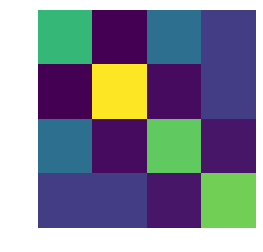

In [21]:
plt.axis('off')
plt.imshow(eqL)

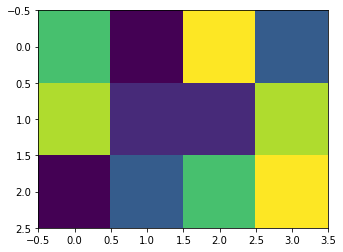

In [20]:
plt.imshow(Q)